# Анализ данных по минералам

Задание:

- провести EDA по данным "минералки"
- посмотреть зависимости "минералки" от таксонов

In [100]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, Normalizer

In [101]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))

In [103]:
DATA_MINERAL_PATH = os.path.join(BASE_DIR, 'data', 'clean', 'data_mineral_all.xlsx')

DOCS_DOMAIN_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'domain.xlsx')
DOCS_PHYLUM_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'phylum.xlsx')
DOCS_CLASS_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'class.xlsx')
DOCS_ORDER_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'order.xlsx')
DOCS_FAMILY_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'family.xlsx')
DOCS_SPECIES_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'species.xlsx')

DOCS_FULL_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'full.xlsx')

In [104]:
df_mineral_all = pd.read_excel(DATA_MINERAL_PATH)

df_domain = pd.read_excel(DOCS_DOMAIN_PATH)
df_phylum = pd.read_excel(DOCS_PHYLUM_PATH)
df_class = pd.read_excel(DOCS_CLASS_PATH)
df_order = pd.read_excel(DOCS_ORDER_PATH)
df_family = pd.read_excel(DOCS_FAMILY_PATH)
df_species = pd.read_excel(DOCS_SPECIES_PATH)

df_docs = pd.read_excel(DOCS_FULL_PATH)

Загружаем данные для анализа

In [105]:
DATA_CLEAN_PATH = os.path.join(BASE_DIR, 'data', 'clean', 'data.xlsx')
DATA_CLEAN_UNWRAP_PATH = os.path.join(BASE_DIR, 'data', 'clean', 'data_unwrap.xlsx')

df_clean = pd.read_excel(DATA_CLEAN_PATH)
df_clean_unwrap = pd.read_excel(DATA_CLEAN_UNWRAP_PATH)

In [106]:
df_clean_unwrap_docs = df_clean_unwrap.merge(df_docs, on=['id_species'], how='left')
df_clean_unwrap_docs.head()

,group,number,id_species,colonies,species,id_family,family,id_order,order,id_class,class,id_phylum,phylum,id_domain,domain
0,ПР,1,1,0,Arthrobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
1,ПР,1,2,0,Galactobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
2,ПР,1,3,0,Corynebacterium,2,Corynebacteriaceae,2,Mycobacteriales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
3,ПР,1,4,5,Adlercreutzia,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria
4,ПР,1,5,0,Gordonibacter,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria


In [107]:
GROUP_CLEAN = 'ПР'

### 1 Проведение анализа на данных по минеральному составу корма

In [108]:
df_mineral_all.head()

,element,ед,ПР,ПДР,Медь,Fe,Целлюлоза,Лакт,Хит,Энтеросгель,АУ,Биф,Спор
0,Li,мг/кг,0.048501,0.105506,0.364260,0.259060,0.161759,0.161235,0.306363,0.161231,0.239582,0.443258,0.458541
1,B,мг/кг,0.343431,1.299598,0.981044,0.700080,1.139135,0.915407,0.407604,1.498330,0.755133,1.183491,0.938932
2,Na,мг/кг,5931.073818,12705.832376,13133.946681,12446.328151,13405.374724,13263.365592,11670.196598,13274.663418,12865.561667,18826.056081,16567.815447
3,Mg,мг/кг,2381.953240,3910.489523,3951.594914,4143.244381,4188.761436,4397.142578,3659.306152,4356.665816,4206.331035,5410.981489,5030.859854
4,Al,мг/кг,168.355520,263.277793,277.711334,204.116328,334.466660,305.798802,257.300486,221.872477,223.965511,276.098940,352.598830


In [109]:
df_mineral = df_mineral_all.set_index('element')
df_mineral.head()

,ед,ПР,ПДР,Медь,Fe,Целлюлоза,Лакт,Хит,Энтеросгель,АУ,Биф,Спор
element,,,,,,,,,,,,
Li,мг/кг,0.048501,0.105506,0.364260,0.259060,0.161759,0.161235,0.306363,0.161231,0.239582,0.443258,0.458541
B,мг/кг,0.343431,1.299598,0.981044,0.700080,1.139135,0.915407,0.407604,1.498330,0.755133,1.183491,0.938932
Na,мг/кг,5931.073818,12705.832376,13133.946681,12446.328151,13405.374724,13263.365592,11670.196598,13274.663418,12865.561667,18826.056081,16567.815447
Mg,мг/кг,2381.953240,3910.489523,3951.594914,4143.244381,4188.761436,4397.142578,3659.306152,4356.665816,4206.331035,5410.981489,5030.859854
Al,мг/кг,168.355520,263.277793,277.711334,204.116328,334.466660,305.798802,257.300486,221.872477,223.965511,276.098940,352.598830


In [110]:
df_mineral.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Li to Pb
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ед           25 non-null     object 
 1   ПР           25 non-null     float64
 2   ПДР          25 non-null     float64
 3   Медь         25 non-null     float64
 4   Fe           25 non-null     float64
 5   Целлюлоза    25 non-null     float64
 6   Лакт         25 non-null     float64
 7   Хит          25 non-null     float64
 8   Энтеросгель  25 non-null     float64
 9   АУ           25 non-null     float64
 10  Биф          25 non-null     float64
 11  Спор         25 non-null     float64
dtypes: float64(11), object(1)
memory usage: 2.5+ KB


In [111]:
df_mineral.nunique()

ед              1
ПР             25
ПДР            25
Медь           25
Fe             25
Целлюлоза      25
Лакт           25
Хит            25
Энтеросгель    25
АУ             25
Биф            25
Спор           25
dtype: int64

Можно удалить колонку `ед` - так как там всего одно значение уникальное **мг/кг**

In [112]:
if 'ед' in df_mineral.columns:
    df_mineral = df_mineral.drop(columns=['ед'])
df_mineral.head()

,ПР,ПДР,Медь,Fe,Целлюлоза,Лакт,Хит,Энтеросгель,АУ,Биф,Спор
element,,,,,,,,,,,
Li,0.048501,0.105506,0.364260,0.259060,0.161759,0.161235,0.306363,0.161231,0.239582,0.443258,0.458541
B,0.343431,1.299598,0.981044,0.700080,1.139135,0.915407,0.407604,1.498330,0.755133,1.183491,0.938932
Na,5931.073818,12705.832376,13133.946681,12446.328151,13405.374724,13263.365592,11670.196598,13274.663418,12865.561667,18826.056081,16567.815447
Mg,2381.953240,3910.489523,3951.594914,4143.244381,4188.761436,4397.142578,3659.306152,4356.665816,4206.331035,5410.981489,5030.859854
Al,168.355520,263.277793,277.711334,204.116328,334.466660,305.798802,257.300486,221.872477,223.965511,276.098940,352.598830


In [113]:
df_mineral_t = df_mineral.T
df_mineral_t.head()

element,Li,B,Na,Mg,Al,Si,P,K,Ca,V,...,Cu,Zn,As,Se,Sr,Cd,Sn,I,Hg,Pb
ПР,0.048501,0.343431,5931.073818,2381.953240,168.355520,290.274943,34216.172846,19191.528053,52792.417593,0.423195,...,23.200000,210.781636,0.129888,2.307114,16.608000,0.068513,0.017373,1.259338,0.015483,1.102994
ПДР,0.105506,1.299598,12705.832376,3910.489523,263.277793,458.846399,60568.776428,35801.883354,80727.890653,0.752472,...,21.528158,339.978931,0.238809,1.800000,27.930834,0.141308,0.119756,3.938236,0.030000,0.666622
Медь,0.364260,0.981044,13133.946681,3951.594914,277.711334,487.995040,61035.405936,34180.443017,61713.331146,0.723458,...,24.200000,288.435772,0.194212,3.280000,18.301966,0.127373,0.073059,4.604907,0.030000,0.557391
Fe,0.259060,0.700080,12446.328151,4143.244381,204.116328,453.511403,64535.595428,31520.523622,79403.044695,0.742214,...,23.300000,286.608816,0.159659,4.035612,22.970813,0.119956,0.045808,4.371894,0.030000,0.936551
Целлюлоза,0.161759,1.139135,13405.374724,4188.761436,334.466660,454.136296,69631.356823,35319.427692,99577.871168,0.748290,...,20.528849,376.709521,0.204414,11.216839,31.725524,0.125348,0.067897,5.793173,0.034018,0.907532


In [114]:
df_mineral_t.describe()

element,Li,B,Na,Mg,Al,Si,P,K,Ca,V,...,Cu,Zn,As,Se,Sr,Cd,Sn,I,Hg,Pb
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.246300,0.923835,13099.110414,4148.848220,262.323880,494.583230,63328.141571,35089.895280,77710.830905,0.775355,...,24.389200,337.678719,0.200868,5.468294,24.092743,0.141335,0.058531,4.471531,0.024359,1.007930
std,0.134958,0.356438,3147.070256,770.583217,55.698060,115.376896,12174.777685,7110.481700,15354.234125,0.184461,...,3.933483,70.080072,0.058989,3.608869,6.166470,0.036591,0.025743,1.374948,0.007396,0.430175
min,0.048501,0.343431,5931.073818,2381.953240,168.355520,290.274943,34216.172846,19191.528053,52792.417593,0.423195,...,17.810589,210.781636,0.116298,1.800000,15.747417,0.068513,0.017373,1.259338,0.015483,0.557391
25%,0.161233,0.727607,12576.080264,3931.042218,222.918994,453.823849,60802.091182,33506.456926,64023.895401,0.732836,...,22.364079,287.522294,0.164891,3.242052,19.145562,0.126361,0.049225,4.075809,0.018851,0.656213
50%,0.239582,0.938932,13133.946681,4188.761436,263.277793,472.202699,64535.595428,35319.427692,80727.890653,0.748290,...,23.428245,339.978931,0.194212,4.203164,23.079328,0.136106,0.057384,4.371894,0.019725,0.907532
75%,0.335312,1.161313,13340.019071,4376.904197,291.755068,531.689339,69119.835340,35565.480152,87843.081915,0.887222,...,26.913372,377.107522,0.245938,6.495210,28.884064,0.153626,0.065240,5.220400,0.030000,1.338690
max,0.458541,1.498330,18826.056081,5410.981489,352.598830,728.399165,77918.569463,47932.675165,99577.871168,1.041382,...,31.233843,457.006561,0.310403,12.825698,33.847082,0.210882,0.119756,6.228530,0.034989,1.728266


### 2 Проведение анализа зависимости минерального состава корма от таксонов

#### 2.1 Готовим данные

У нас есть минералка подобавкам

In [115]:
df_mineral_t.head()

element,Li,B,Na,Mg,Al,Si,P,K,Ca,V,...,Cu,Zn,As,Se,Sr,Cd,Sn,I,Hg,Pb
ПР,0.048501,0.343431,5931.073818,2381.953240,168.355520,290.274943,34216.172846,19191.528053,52792.417593,0.423195,...,23.200000,210.781636,0.129888,2.307114,16.608000,0.068513,0.017373,1.259338,0.015483,1.102994
ПДР,0.105506,1.299598,12705.832376,3910.489523,263.277793,458.846399,60568.776428,35801.883354,80727.890653,0.752472,...,21.528158,339.978931,0.238809,1.800000,27.930834,0.141308,0.119756,3.938236,0.030000,0.666622
Медь,0.364260,0.981044,13133.946681,3951.594914,277.711334,487.995040,61035.405936,34180.443017,61713.331146,0.723458,...,24.200000,288.435772,0.194212,3.280000,18.301966,0.127373,0.073059,4.604907,0.030000,0.557391
Fe,0.259060,0.700080,12446.328151,4143.244381,204.116328,453.511403,64535.595428,31520.523622,79403.044695,0.742214,...,23.300000,286.608816,0.159659,4.035612,22.970813,0.119956,0.045808,4.371894,0.030000,0.936551
Целлюлоза,0.161759,1.139135,13405.374724,4188.761436,334.466660,454.136296,69631.356823,35319.427692,99577.871168,0.748290,...,20.528849,376.709521,0.204414,11.216839,31.725524,0.125348,0.067897,5.793173,0.034018,0.907532


А также есть абсолютные значения таксонов и относительные по кормам

По всем таксонам

In [116]:
df_clean.head()

,group,number,Arthrobacter,Galactobacter,Corynebacterium,Adlercreutzia,Gordonibacter,Paraeggerthella,Rubneribacter,Slackia,...,Turicimonas,Vampirovibrio,Enterobacter,Escherichia/Shigella,Klebsiella,unclassified_Enterobacteriaceae,Acinetobacter,Stenotrophomonas,unclassified_Bacteria,unclassified_Dothideomycetes
0,ПР,1,0,0,0,5,0,0,77,0,...,3,23,487,0,5,0,3,3,3,0
1,ПР,2,0,0,5,10,0,0,95,3,...,0,8,100,0,0,0,0,3,4,0
2,ПДР,1,0,0,3,0,0,0,22,0,...,0,0,56,6,0,0,0,4,0,0
3,ПДР,2,10,0,0,0,0,0,23,0,...,9,21,316,11,5,0,0,26,3,0
4,Целлюлоза,1,0,4,3,0,0,0,19,0,...,8,0,323,8,6,0,0,0,0,0


In [117]:
df_clean_temp = df_clean.set_index(['group', 'number']).sort_index()
df_clean_temp.iloc[:, :] = Normalizer(norm='l1').fit_transform(df_clean_temp)
df_clean_normalize = df_clean_temp
df_clean_normalize.head()

Arthrobacter  Galactobacter  Corynebacterium  Adlercreutzia  \
group number                                                                
Fe    1           0.000000            0.0         0.000000       0.000000   
      2           0.000000            0.0         0.000286       0.000000   
АУ    1           0.000000            0.0         0.000233       0.000000   
      2           0.000341            0.0         0.000000       0.000000   
Биф   1           0.000000            0.0         0.000316       0.000443   

              Gordonibacter  Paraeggerthella  Rubneribacter  Slackia  \
group number                                                           
Fe    1            0.000000                0       0.000715      0.0   
      2            0.000229                0       0.000458      0.0   
АУ    1            0.000000                0       0.000372      0.0   
      2            0.000000                0       0.000613      0.0   
Биф   1            0.000380                0       0.000506      0.0   

              unclassified_Eggerthellaceae  Bacteroides  ...  Turicimonas  \
group number                                             ...                
Fe    1                                0.0     0.449504  ...     0.000272   
      2                                0.0     0.408646  ...     0.000229   
АУ    1                                0.0     0.339243  ...     0.000000   
      2                                0.0     0.633334  ...     0.001192   
Биф   1                                0.0     0.145533  ...     0.000000   

              Vampirovibrio  Enterobacter  Escherichia/Shigella  Klebsiella  \
group number                                                                  
Fe    1            0.002316      0.001703                   0.0    0.000000   
      2            0.000172      0.018551                   0.0    0.000515   
АУ    1            0.000279      0.001163                   0.0    0.000000   
      2            0.000715      0.005076                   0.0    0.000000   
Биф   1            0.001708      0.030246                   0.0    0.000759   

              unclassified_Enterobacteriaceae  Acinetobacter  \
group number                                                   
Fe    1                                   0.0            0.0   
      2                                   0.0            0.0   
АУ    1                                   0.0            0.0   
      2                                   0.0            0.0   
Биф   1                                   0.0            0.0   

              Stenotrophomonas  unclassified_Bacteria  \
group number                                            
Fe    1               0.000170               0.000170   
      2               0.000000               0.000286   
АУ    1               0.000000               0.000000   
      2               0.000000               0.000000   
Биф   1               0.000823               0.000000   

              unclassified_Dothideomycetes  
group number                                
Fe    1                                0.0  
      2                                0.0  
АУ    1                                0.0  
      2                                0.0  
Биф   1                                0.0  

[5 rows x 108 columns]

Нормализация по семействам

In [118]:
df_clean_by_family = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['family'], columns=['group', 'number'], aggfunc='sum')
df_clean_by_family = df_clean_by_family.T
df_clean_by_family_normalize = df_clean_by_family.copy()
df_clean_by_family_normalize.iloc[:,:] = Normalizer(norm='l1').fit_transform(df_clean_by_family)
df_clean_by_family_normalize.head(5)

family        Bacillaceae 1  Bacteroidaceae  Barnesiellaceae  \
group number                                                   
Fe    1            0.000204        0.456249         0.027692   
      2            0.009390        0.414257         0.000744   
АУ    1            0.000279        0.370096         0.000791   
      2            0.000000        0.639126         0.001158   
Биф   1            0.004556        0.153632         0.002847   

family        Bdellovibrionaceae  Brucellaceae  Carnobacteriaceae  \
group number                                                        
Fe    1                 0.002316       0.00000           0.000000   
      2                 0.000172       0.00000           0.000573   
АУ    1                 0.000279       0.00000           0.000000   
      2                 0.000715       0.00000           0.000000   
Биф   1                 0.001708       0.00019           0.000506   

family        Catabacteriaceae  Christensenellaceae  Clostridiaceae 1  \
group number                                                            
Fe    1               0.000238             0.000102                 0   
      2               0.064357             0.000000                 0   
АУ    1               0.000326             0.000000                 0   
      2               0.007632             0.000000                 0   
Биф   1               0.006581             0.000000                 0   

family        Clostridiales_Incertae Sedis XIII  ...  Streptococcaceae  \
group number                                     ...                     
Fe    1                                0.000681  ...          0.000272   
      2                                0.001202  ...          0.001889   
АУ    1                                0.001117  ...          0.000000   
      2                                0.001192  ...          0.000000   
Биф   1                                0.000000  ...          0.006011   

family        Sutterellaceae  Xanthomonadaceae  unclassified_"Bacteroidales"  \
group number                                                                   
Fe    1             0.000272          0.000170                           0.0   
      2             0.000229          0.000000                           0.0   
АУ    1             0.000000          0.000000                           0.0   
      2             0.001192          0.000000                           0.0   
Биф   1             0.000000          0.000823                           0.0   

family        unclassified_Bacillales  unclassified_Bacteria  \
group number                                                   
Fe    1                      0.000000               0.000170   
      2                      0.000344               0.000286   
АУ    1                      0.000000               0.000000   
      2                      0.000000               0.000000   
Биф   1                      0.000823               0.000000   

family        unclassified_Clostridiales  unclassified_Dothideomycetes  \
group number                                                             
Fe    1                         0.005756                           0.0   
      2                         0.012310                           0.0   
АУ    1                         0.002559                           0.0   
      2                         0.018568                           0.0   
Биф   1                         0.005062                           0.0   

family        unclassified_Firmicutes  unclassified_Lactobacillales  
group number                                                         
Fe    1                      0.003031                      0.000000  
      2                      0.001145                      0.000000  
АУ    1                      0.000512                      0.000000  
      2                      0.001124                      0.000000  
Биф   1                      0.001329                      0.000253  

[5 rows x 37 col

Нормализованное представление по порядкам

In [119]:
df_clean_by_order = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['order'], columns=['group', 'number'], aggfunc='sum')
df_clean_by_order = df_clean_by_order.T
df_clean_by_order_normalize = df_clean_by_order.copy()
df_clean_by_order_normalize.iloc[:,:] = Normalizer(norm='l1').fit_transform(df_clean_by_order)
df_clean_by_order_normalize.head(5)

order         Bacillales  Bacteroidales  Bdellovibrionales  Burkholderiales  \
group number                                                                  
Fe    1         0.000204       0.619878           0.002316         0.000272   
      2         0.009734       0.445806           0.000172         0.000229   
АУ    1         0.000279       0.542650           0.000279         0.000000   
      2         0.000000       0.679295           0.000715         0.001192   
Биф   1         0.005378       0.430967           0.001708         0.000000   

order         Clostridiales  Eggerthellales  Enterobacteriales  \
group number                                                     
Fe    1            0.179809        0.000715           0.001703   
      2            0.391640        0.000687           0.019067   
АУ    1            0.393271        0.000372           0.001163   
      2            0.234132        0.000613           0.005076   
Биф   1            0.168438        0.001329           0.031005   

order         Erysipelotrichales  Kiloniellales  Lactobacillales  \
group number                                                       
Fe    1                 0.013761       0.000102         0.177867   
      2                 0.006127       0.000000         0.124821   
АУ    1                 0.000372       0.000000         0.060868   
      2                 0.008654       0.000273         0.068584   
Биф   1                 0.005189       0.000000         0.353328   

order         Micrococcales  Mycobacteriales  Pseudomonadales  Rhizobiales  \
group number                                                                 
Fe    1            0.000000         0.000000              0.0      0.00000   
      2            0.000000         0.000286              0.0      0.00000   
АУ    1            0.000000         0.000233              0.0      0.00000   
      2            0.000341         0.000000              0.0      0.00000   
Биф   1            0.000000         0.000316              0.0      0.00019   

order         Xanthomonadales  unclassified_Bacteria  \
group number                                           
Fe    1              0.000170               0.000170   
      2              0.000000               0.000286   
АУ    1              0.000000               0.000000   
      2              0.000000               0.000000   
Биф   1              0.000823               0.000000   

order         unclassified_Dothideomycetes  unclassified_Firmicutes  
group number                                                         
Fe    1                                0.0                 0.003031  
      2                                0.0                 0.001145  
АУ    1                                0.0                 0.000512  
      2                                0.0                 0.001124  
Биф   1                                0.0                 0.001329

Нормализованное представление по классам

In [120]:
df_clean_by_class = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['class'], columns=['group', 'number'], aggfunc='sum')
df_clean_by_class = df_clean_by_class.T
df_clean_by_class_normalize = df_clean_by_class.copy()
df_clean_by_class_normalize.iloc[:,:] = Normalizer(norm='l1').fit_transform(df_clean_by_class)
df_clean_by_class_normalize.head(5)

class         Actinobacteria  Alphaproteobacteria   Bacilli  Bacteroidia  \
group number                                                               
Fe    1             0.000000             0.000102  0.178071     0.619878   
      2             0.000286             0.000000  0.134555     0.445806   
АУ    1             0.000233             0.000000  0.061148     0.542650   
      2             0.000341             0.000273  0.068584     0.679295   
Биф   1             0.000316             0.000190  0.358707     0.430967   

class         Betaproteobacteria  Clostridia  Coriobacteriia  \
group number                                                   
Fe    1                 0.000272    0.179809        0.000715   
      2                 0.000229    0.391640        0.000687   
АУ    1                 0.000000    0.393271        0.000372   
      2                 0.001192    0.234132        0.000613   
Биф   1                 0.000000    0.168438        0.001329   

class         Deltaproteobacteria  Dothideomycetes  Erysipelotrichia  \
group number                                                           
Fe    1                  0.002316              0.0          0.013761   
      2                  0.000172              0.0          0.006127   
АУ    1                  0.000279              0.0          0.000372   
      2                  0.000715              0.0          0.008654   
Биф   1                  0.001708              0.0          0.005189   

class         Gammaproteobacteria  unclassified_Bacteria  \
group number                                               
Fe    1                  0.001873               0.000170   
      2                  0.019067               0.000286   
АУ    1                  0.001163               0.000000   
      2                  0.005076               0.000000   
Биф   1                  0.031827               0.000000   

class         unclassified_Firmicutes  
group number                           
Fe    1                      0.003031  
      2                      0.001145  
АУ    1                      0.000512  
      2                      0.001124  
Биф   1                      0.001329

Нормализованное представление по филумам

In [121]:
df_clean_by_phylum = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['phylum'], columns=['group', 'number'], aggfunc='sum')
df_clean_by_phylum = df_clean_by_phylum.T
df_clean_by_phylum_normalize = df_clean_by_phylum.copy()
df_clean_by_phylum_normalize.iloc[:,:] = Normalizer(norm='l1').fit_transform(df_clean_by_phylum)
df_clean_by_phylum_normalize.head(5)

phylum        Actinobacteria  Ascomycota  Bacteroidetes  Firmicutes  \
group number                                                          
Fe    1             0.000715         0.0       0.619878    0.374672   
      2             0.000973         0.0       0.445806    0.533467   
АУ    1             0.000605         0.0       0.542650    0.455303   
      2             0.000954         0.0       0.679295    0.312494   
Биф   1             0.001645         0.0       0.430967    0.533662   

phylum        Proteobacteria  unclassified_Bacteria  
group number                                         
Fe    1             0.004564               0.000170  
      2             0.019468               0.000286  
АУ    1             0.001443               0.000000  
      2             0.007257               0.000000  
Биф   1             0.033726               0.000000

#### 2.2 Анализ по кастам абсолютных и относительных показателей

In [122]:
df_mineral_t.head()

element,Li,B,Na,Mg,Al,Si,P,K,Ca,V,...,Cu,Zn,As,Se,Sr,Cd,Sn,I,Hg,Pb
ПР,0.048501,0.343431,5931.073818,2381.953240,168.355520,290.274943,34216.172846,19191.528053,52792.417593,0.423195,...,23.200000,210.781636,0.129888,2.307114,16.608000,0.068513,0.017373,1.259338,0.015483,1.102994
ПДР,0.105506,1.299598,12705.832376,3910.489523,263.277793,458.846399,60568.776428,35801.883354,80727.890653,0.752472,...,21.528158,339.978931,0.238809,1.800000,27.930834,0.141308,0.119756,3.938236,0.030000,0.666622
Медь,0.364260,0.981044,13133.946681,3951.594914,277.711334,487.995040,61035.405936,34180.443017,61713.331146,0.723458,...,24.200000,288.435772,0.194212,3.280000,18.301966,0.127373,0.073059,4.604907,0.030000,0.557391
Fe,0.259060,0.700080,12446.328151,4143.244381,204.116328,453.511403,64535.595428,31520.523622,79403.044695,0.742214,...,23.300000,286.608816,0.159659,4.035612,22.970813,0.119956,0.045808,4.371894,0.030000,0.936551
Целлюлоза,0.161759,1.139135,13405.374724,4188.761436,334.466660,454.136296,69631.356823,35319.427692,99577.871168,0.748290,...,20.528849,376.709521,0.204414,11.216839,31.725524,0.125348,0.067897,5.793173,0.034018,0.907532


In [123]:
def get_ind_and_col_non_nan(df: pd.DataFrame) -> list:
    indexes = []
    for row_index in df.index:
        for col in df.columns:
            if not np.isnan(df.loc[row_index, col]):
                indexes.append((row_index, col))
    return indexes 

In [124]:
def make_analysis_mineral_by_taxons(df_mineral, df_taxons, thr=0.6):
    """Построение отчета по минералке от такснов

    Args:
        df_mineral (pd.DataFrame): показатели по столбцах минеральный состав, по строкам группы
        df_taxons (pd.DataFrame): по строкам группы без колонки number
    """
    df_merge = df_mineral.merge(df_taxons, on=['group'], how='inner')
    corr_m = df_merge.drop(columns=['group']).corr().loc[df_mineral.drop(columns=['group']).columns, df_taxons.drop(columns=['group']).columns]
    indexes_corr = get_ind_and_col_non_nan(corr_m.where(np.abs(corr_m) >= thr))
    for ind_corr in indexes_corr:
        m_filter = df_merge[['group'] + list(ind_corr)]
        print(f'Коэффициент корреляции [{ind_corr[0]}, {ind_corr[1]}] = {corr_m.loc[ind_corr[0], ind_corr[1]]}')
        sns.scatterplot(m_filter, x=ind_corr[0], y=ind_corr[1], hue='group')
        plt.show()

##### 2.2.1 Анализ по филумам

Коэффициент корреляции [Ni, Proteobacteria] = 0.634376323366834


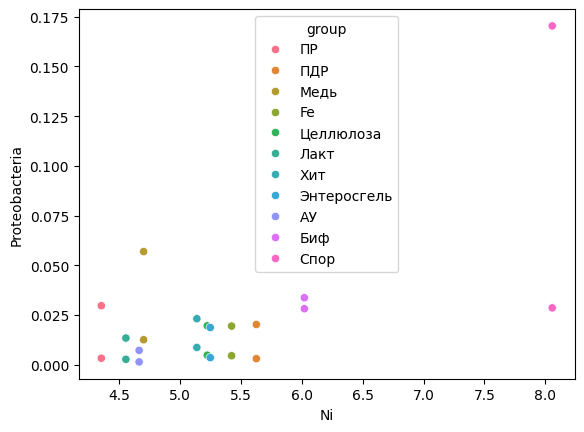

In [125]:
make_analysis_mineral_by_taxons(df_mineral_t.reset_index().rename({'index': 'group'}, axis=1), 
                                df_clean_by_phylum_normalize.reset_index().drop(columns=['number']))

##### 2.2.2 Анализ по классам

Коэффициент корреляции [Ni, Gammaproteobacteria] = 0.6207117042891975


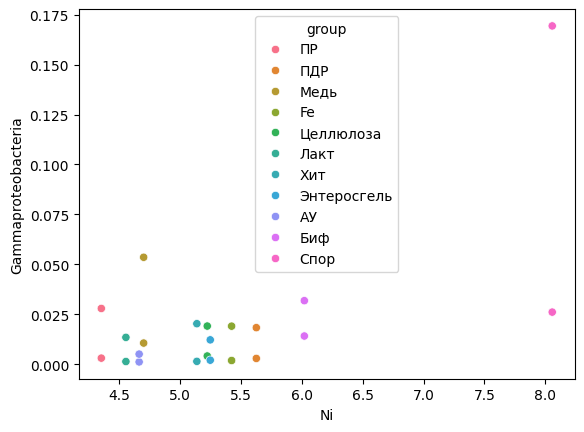

In [126]:
make_analysis_mineral_by_taxons(df_mineral_t.reset_index().rename({'index': 'group'}, axis=1), 
                                df_clean_by_class_normalize.reset_index().drop(columns=['number']))

##### 2.2.3 Анализ по порядкам

Коэффициент корреляции [Li, Rhizobiales] = 0.6532655135803842


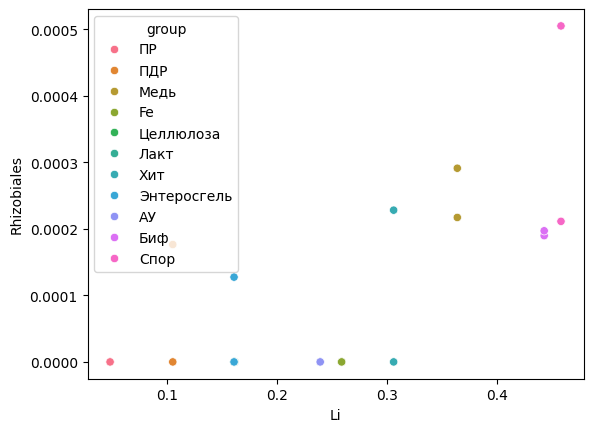

Коэффициент корреляции [Cr, Rhizobiales] = 0.6100533978960786


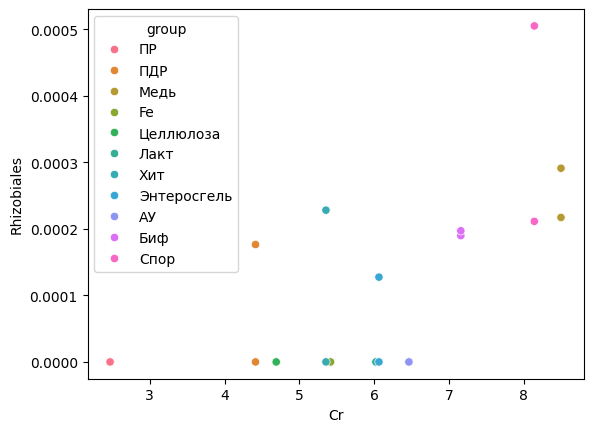

In [68]:
make_analysis_mineral_by_taxons(df_mineral_t.reset_index().rename({'index': 'group'}, axis=1), 
                                df_clean_by_order_normalize.reset_index().drop(columns=['number']))

##### 2.2.4 Анализ по семействам

Коэффициент корреляции [Li, Brucellaceae] = 0.6999612572683223


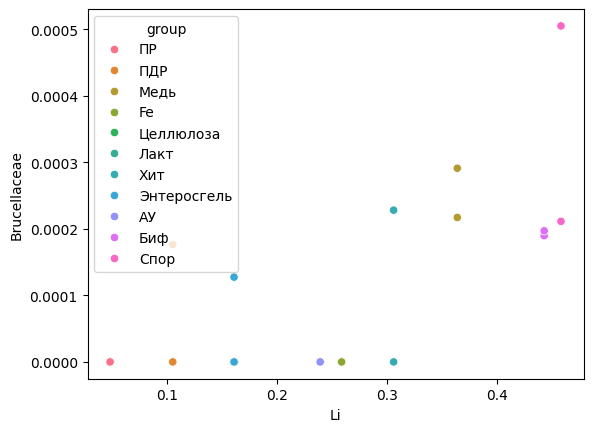

Коэффициент корреляции [Li, Streptococcaceae] = 0.7460959307909416


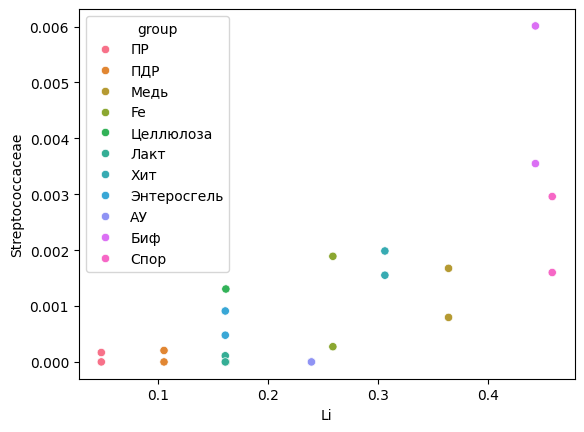

Коэффициент корреляции [Na, Streptococcaceae] = 0.659836630061053


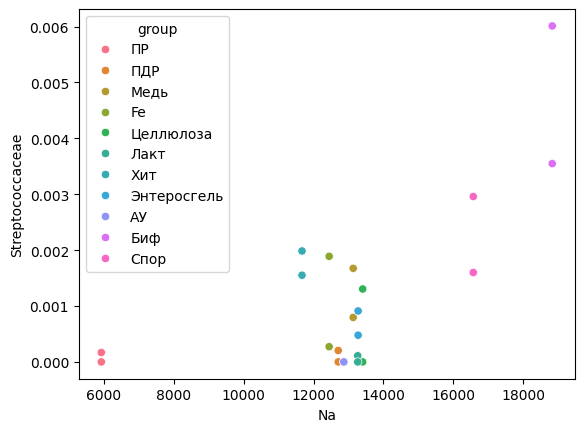

Коэффициент корреляции [Si, Streptococcaceae] = 0.6697577896218837


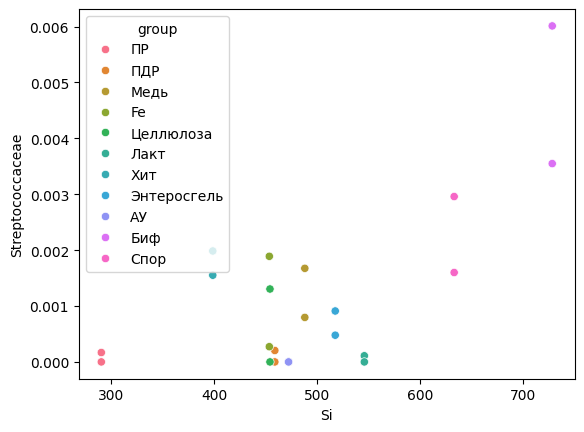

Коэффициент корреляции [K, Streptococcaceae] = 0.6464953424063621


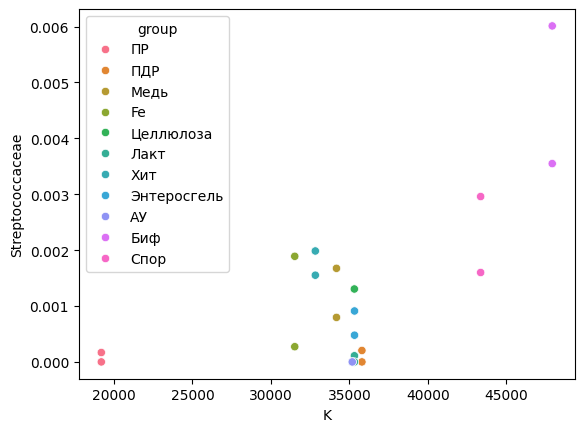

Коэффициент корреляции [Cr, Brucellaceae] = 0.6358591024619235


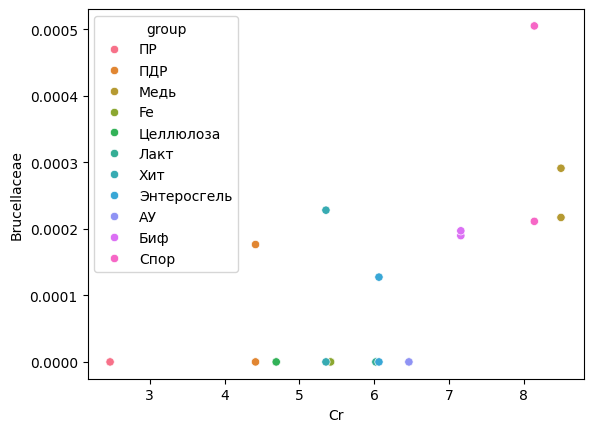

Коэффициент корреляции [Fe, Streptococcaceae] = 0.6487642223939494


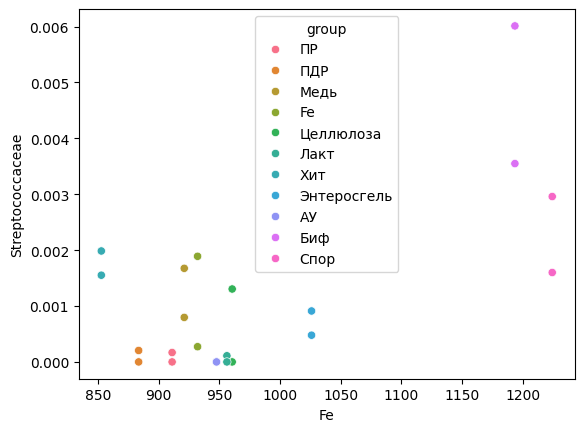

Коэффициент корреляции [Co, Brucellaceae] = 0.6034103621541229


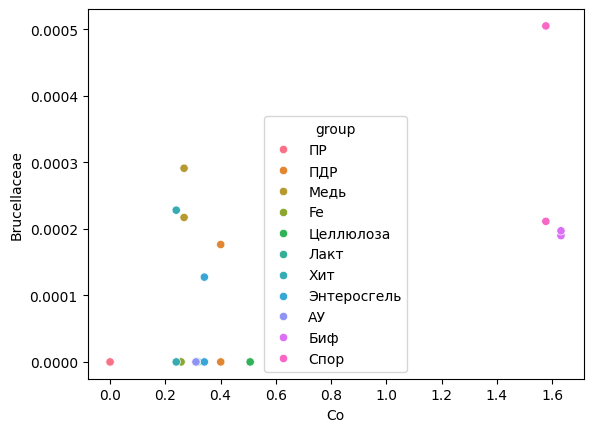

Коэффициент корреляции [Co, Streptococcaceae] = 0.7537673021577331


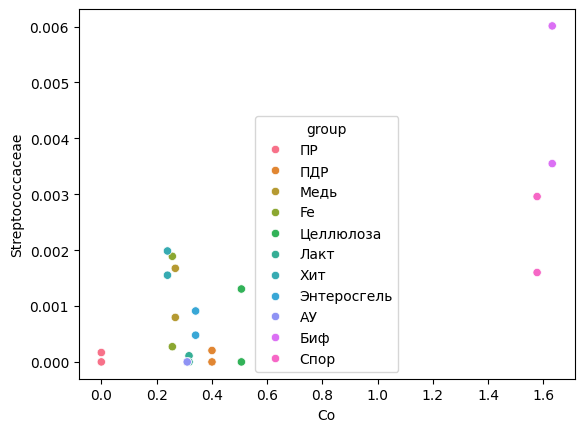

Коэффициент корреляции [Ni, Brucellaceae] = 0.6336175821679645


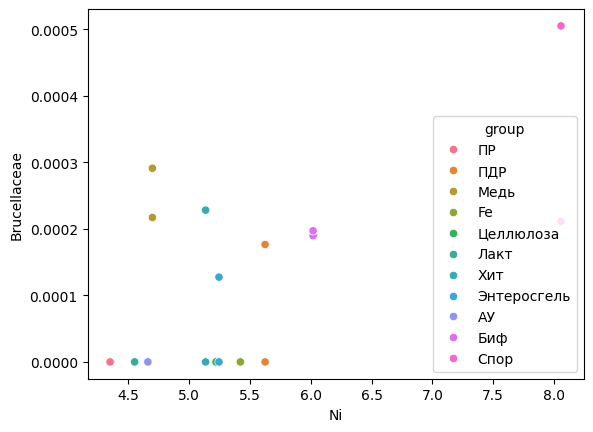

Коэффициент корреляции [Ni, Enterobacteriaceae] = 0.6257696799652871


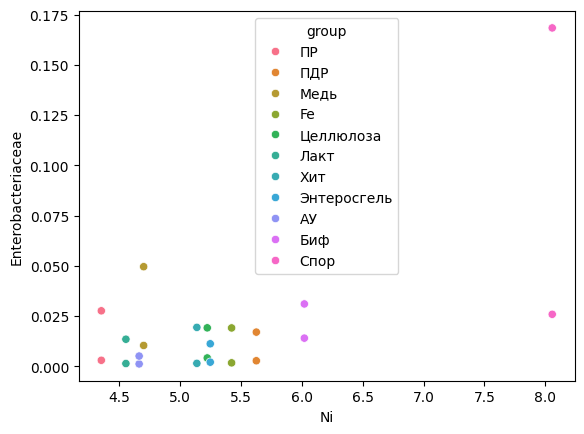

In [127]:
make_analysis_mineral_by_taxons(df_mineral_t.reset_index().rename({'index': 'group'}, axis=1), 
                                df_clean_by_family_normalize.reset_index().drop(columns=['number']))

##### 2.2.5 Анализ по всем таксонам

Коэффициент корреляции [Li, Lactobacillus] = -0.6000841814804218


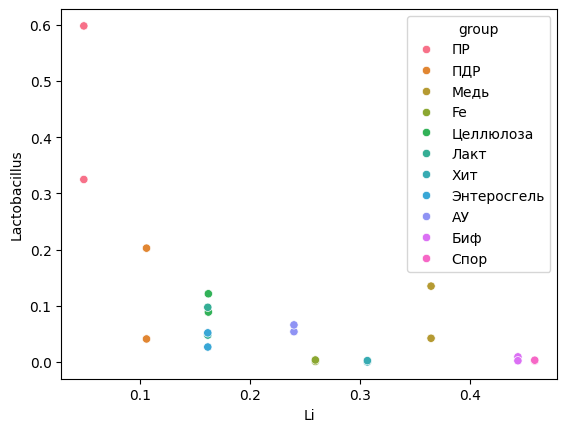

Коэффициент корреляции [Li, Weissella] = 0.6094616069404387


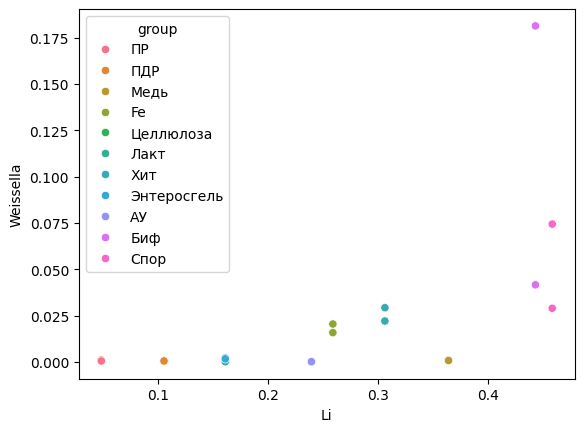

Коэффициент корреляции [Li, Lactococcus] = 0.7222687220253814


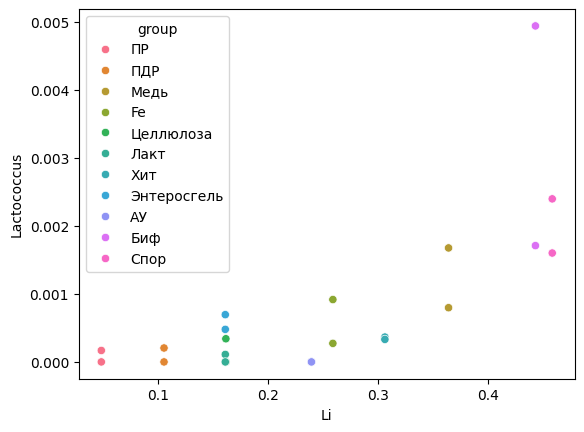

Коэффициент корреляции [Li, Brucella] = 0.6999612572683223


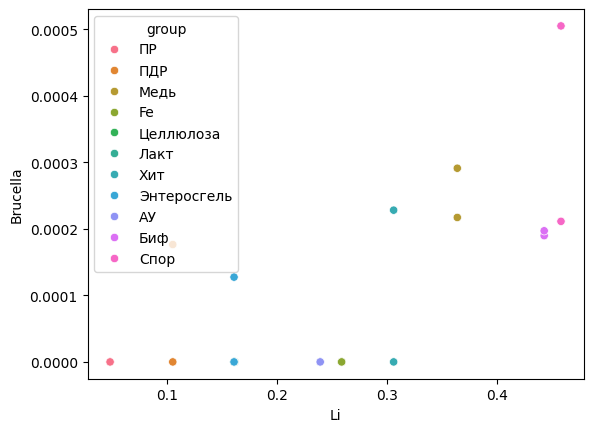

Коэффициент корреляции [B, Lachnospiracea_incertae_sedis] = 0.6112092868465927


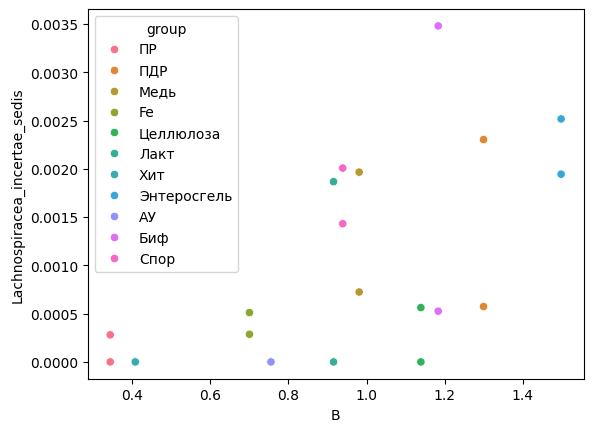

Коэффициент корреляции [B, Hydrogeniiclostridium] = -0.6079213772149908


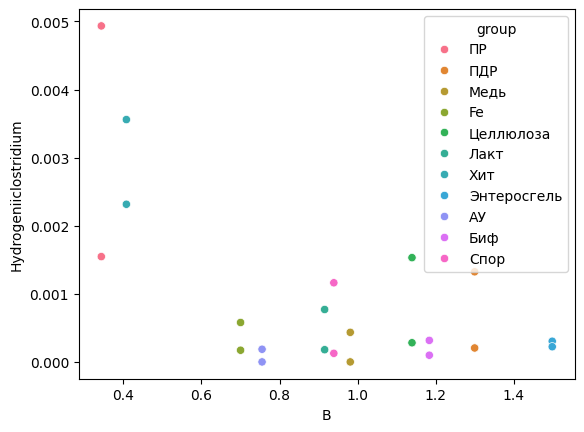

Коэффициент корреляции [Na, Lactobacillus] = -0.7333578720091514


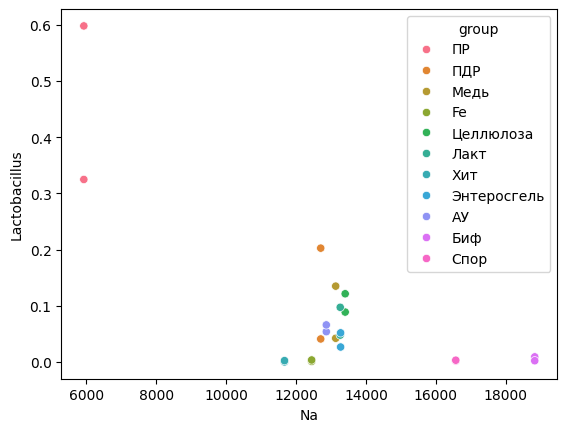

Коэффициент корреляции [Na, Lactococcus] = 0.6620185471232772


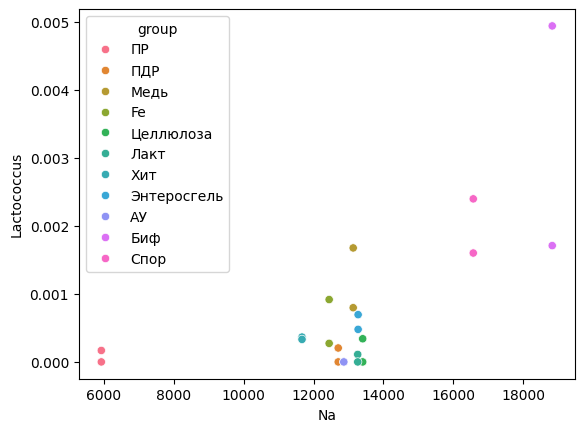

Коэффициент корреляции [Mg, Lactobacillus] = -0.7486366757566346


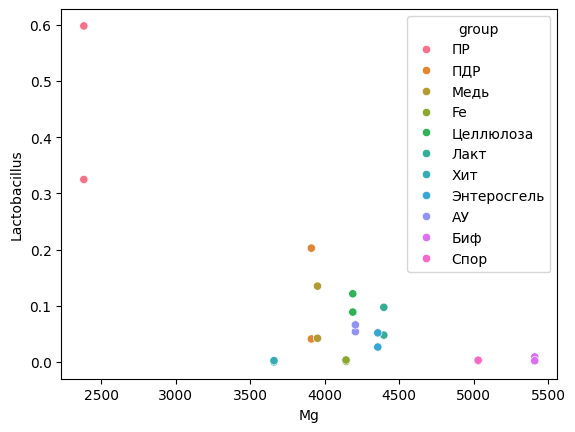

Коэффициент корреляции [Mg, Lactococcus] = 0.6044046719777124


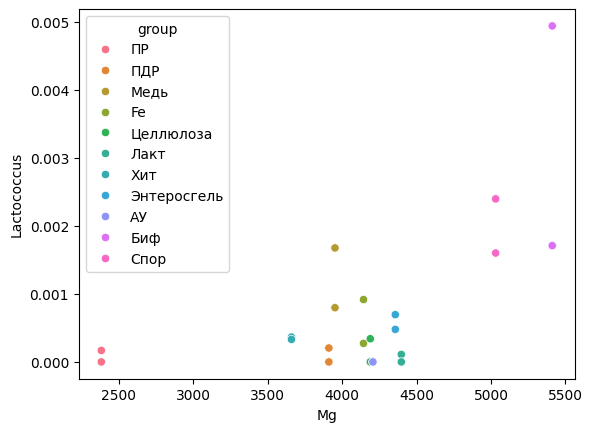

Коэффициент корреляции [Mg, Hydrogeniiclostridium] = -0.6393834449040984


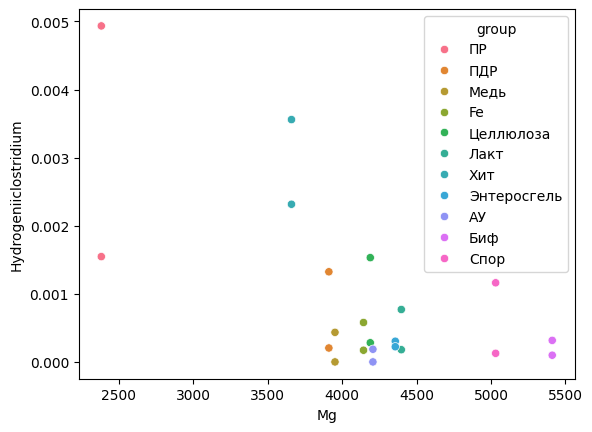

Коэффициент корреляции [Si, Lactobacillus] = -0.6025454028409141


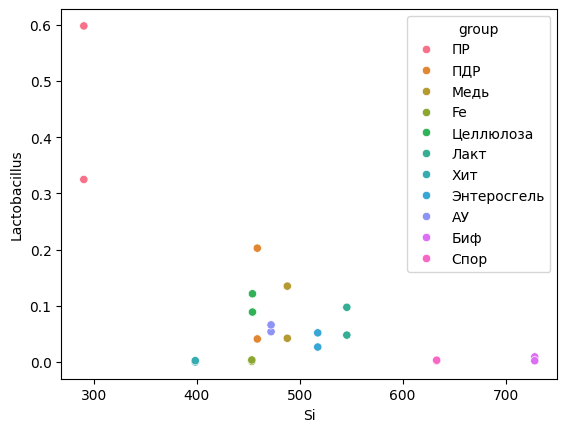

Коэффициент корреляции [Si, Weissella] = 0.6201098368941459


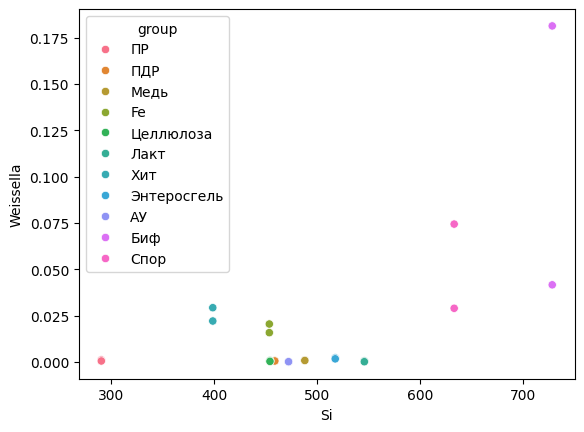

Коэффициент корреляции [Si, Lactococcus] = 0.7155139398939216


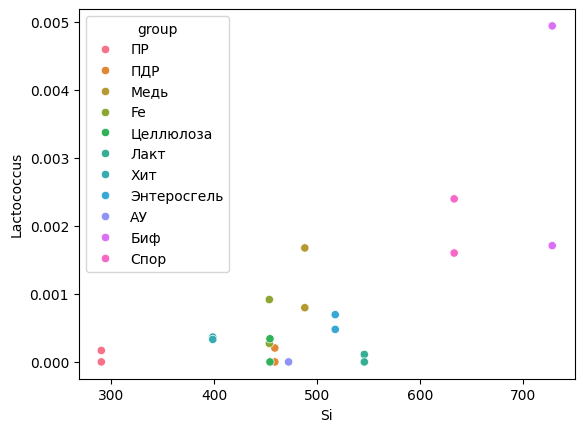

Коэффициент корреляции [P, Lactobacillus] = -0.7336167400554003


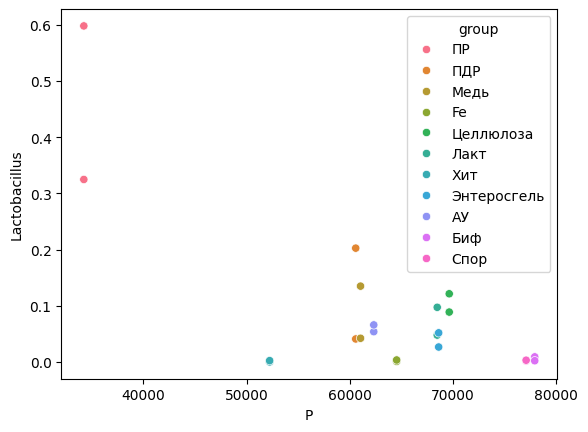

Коэффициент корреляции [P, Hydrogeniiclostridium] = -0.6871586439471346


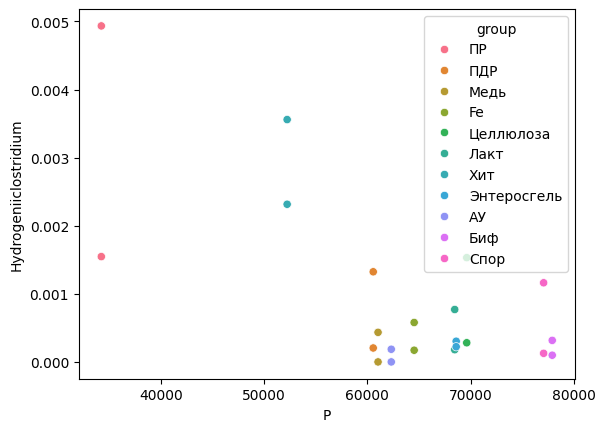

Коэффициент корреляции [K, Lactobacillus] = -0.71215451115967


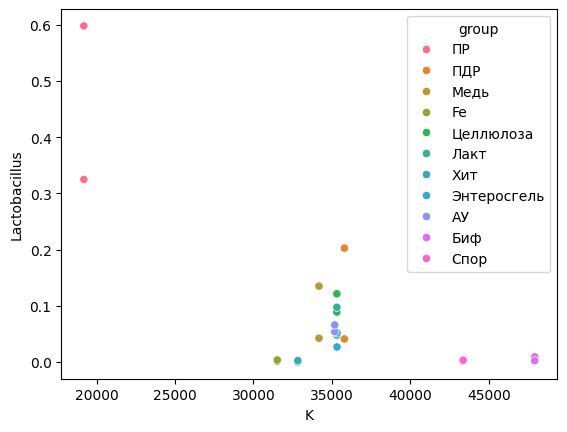

Коэффициент корреляции [K, Lactococcus] = 0.6435200566027838


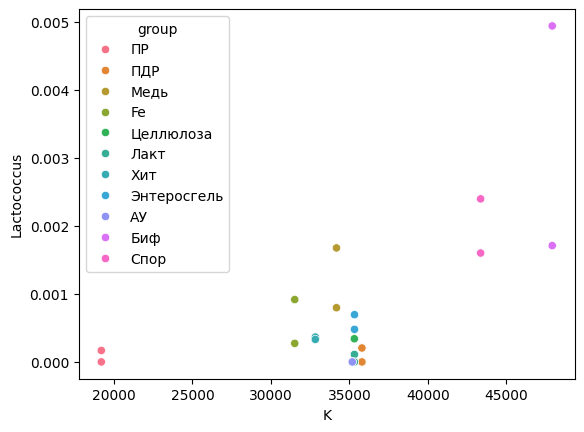

Коэффициент корреляции [V, Lactobacillus] = -0.6044726250338412


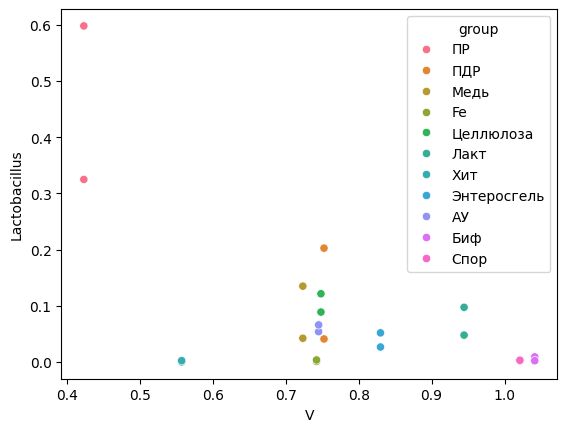

Коэффициент корреляции [V, Hydrogeniiclostridium] = -0.6489960958440859


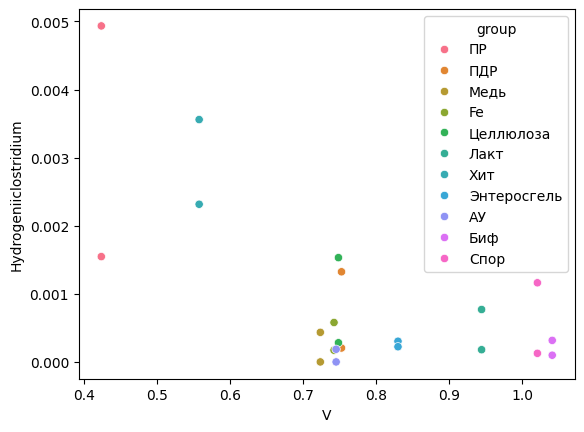

Коэффициент корреляции [Cr, Lactobacillus] = -0.6469703660739015


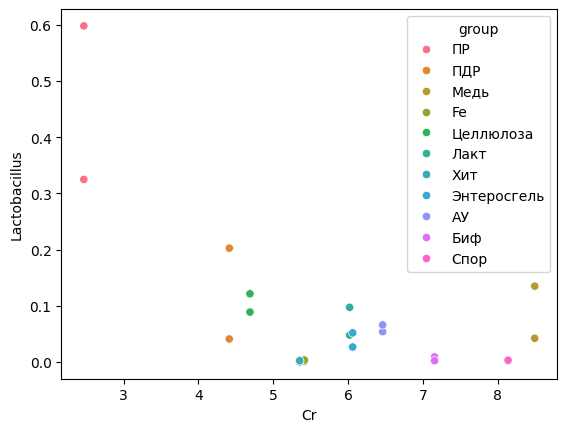

Коэффициент корреляции [Cr, Brucella] = 0.6358591024619235


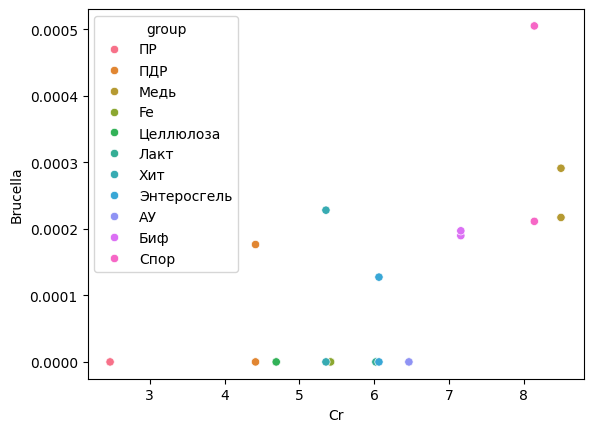

Коэффициент корреляции [Mn, Lactobacillus] = -0.6229551785595221


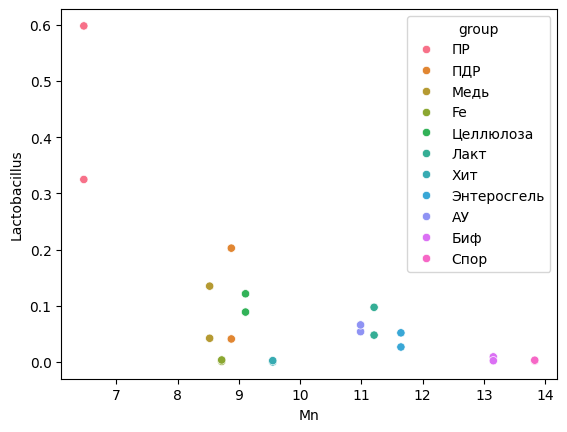

Коэффициент корреляции [Mn, Massiliimalia] = -0.6120502087145259


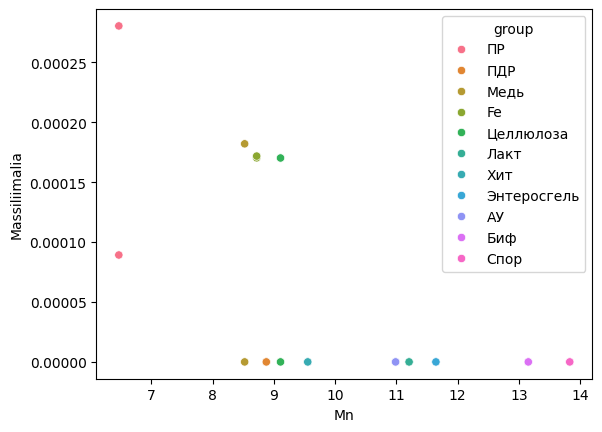

Коэффициент корреляции [Fe, Weissella] = 0.6289420321562187


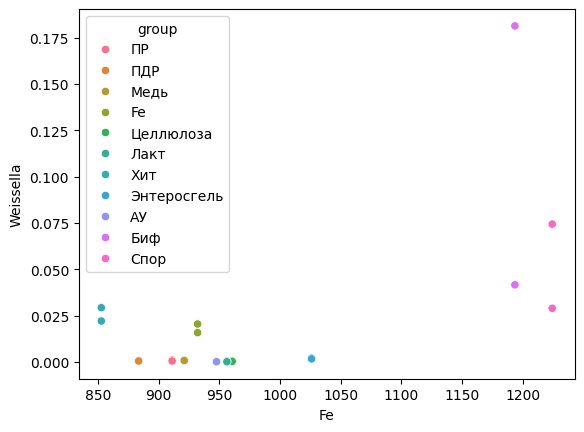

Коэффициент корреляции [Fe, Lactococcus] = 0.7270379511159999


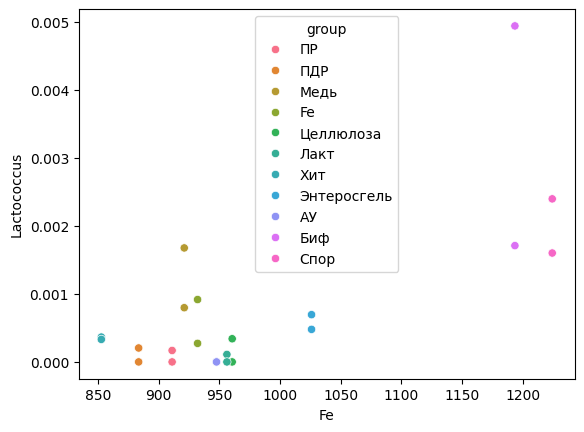

Коэффициент корреляции [Co, Weissella] = 0.7170108937548046


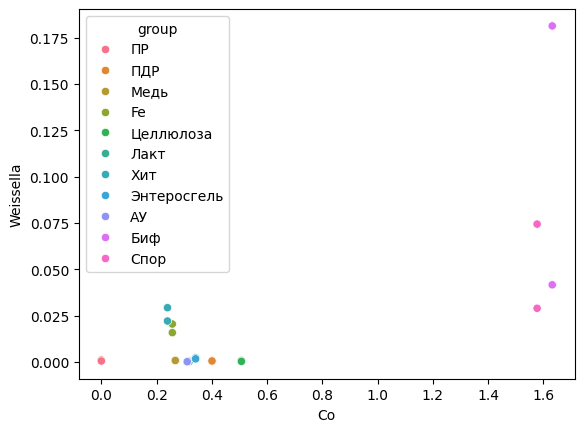

Коэффициент корреляции [Co, Lactococcus] = 0.7711765964232211


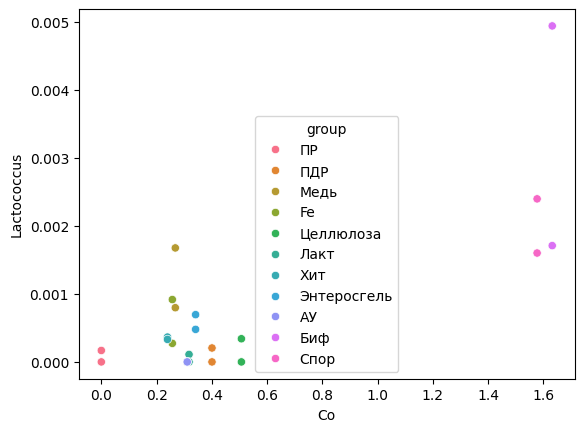

Коэффициент корреляции [Co, Brucella] = 0.6034103621541229


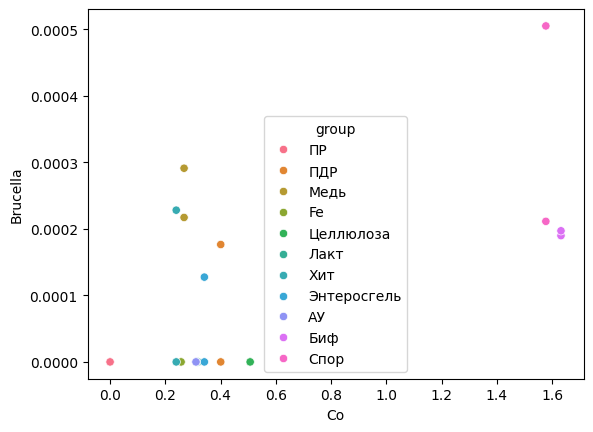

Коэффициент корреляции [Ni, Brucella] = 0.6336175821679645


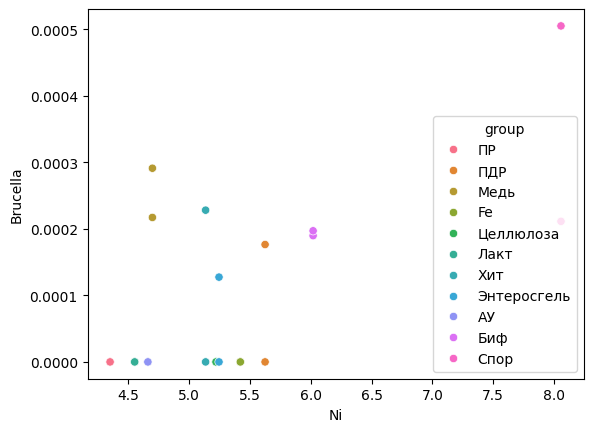

Коэффициент корреляции [Ni, Enterobacter] = 0.6247765407957544


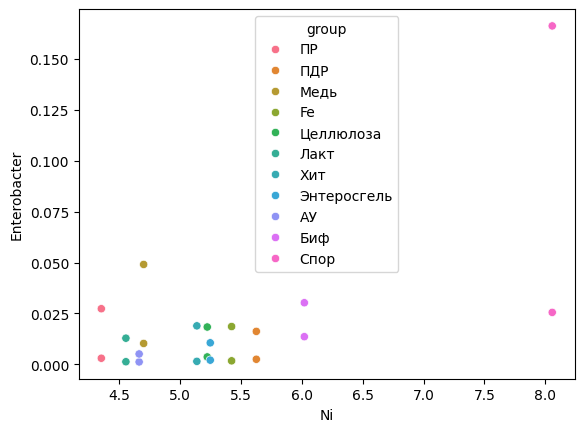

Коэффициент корреляции [Ni, Klebsiella] = 0.6185732983619033


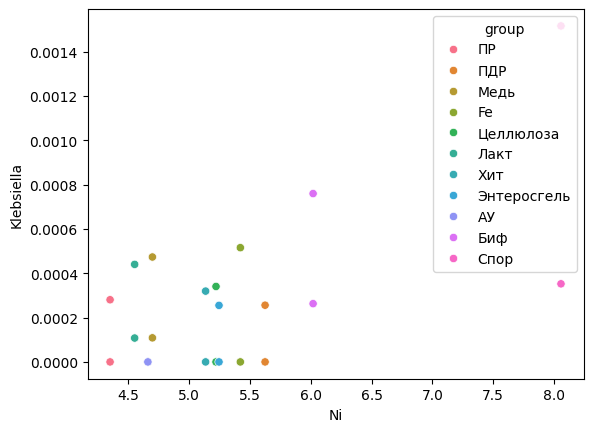

Коэффициент корреляции [Ni, unclassified_Enterobacteriaceae] = 0.6029116959815933


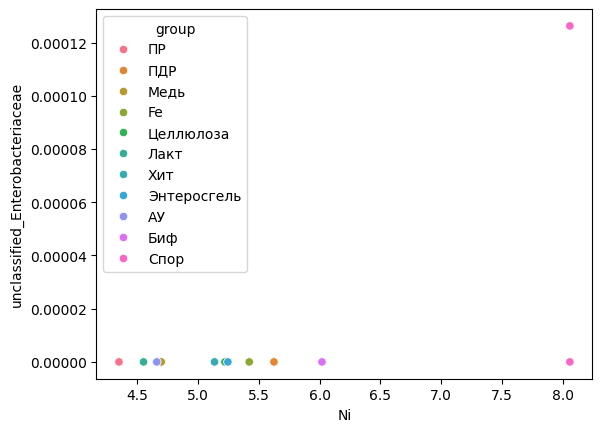

Коэффициент корреляции [Se, Fournierella] = 0.6211501706252428


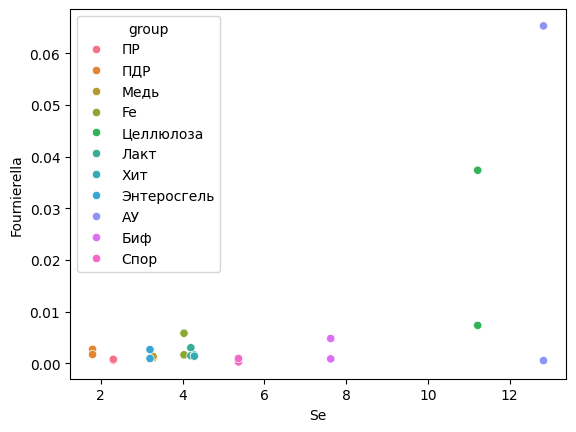

Коэффициент корреляции [Cd, Lactobacillus] = -0.6447798001029786


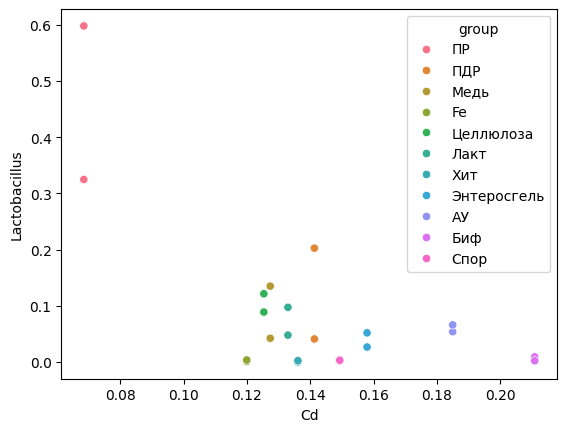

Коэффициент корреляции [Cd, Massiliimalia] = -0.6115384598656237


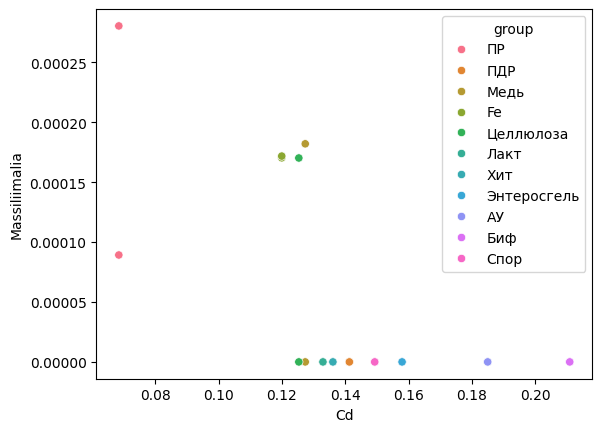

Коэффициент корреляции [I, Lactobacillus] = -0.7141521833106932


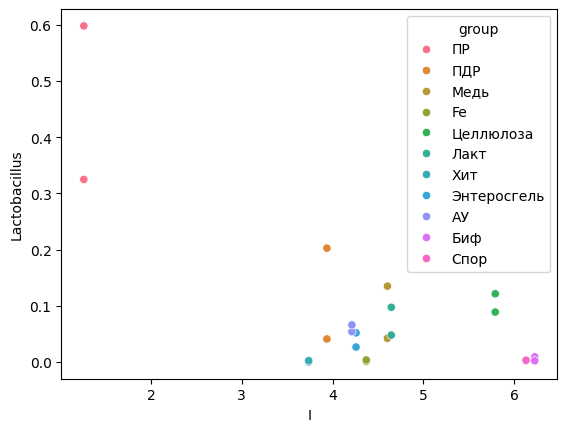

In [128]:
make_analysis_mineral_by_taxons(df_mineral_t.reset_index().rename({'index': 'group'}, axis=1), 
                                df_clean_normalize.reset_index().drop(columns=['number']))